Ejercicio 1

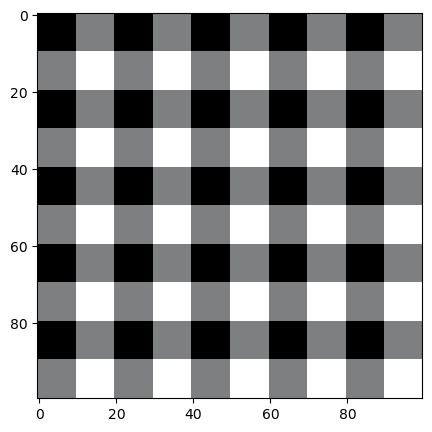

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.rcParams['figure.figsize']=[10,5]

tamanio_img=100
R = np.ones((tamanio_img, tamanio_img)) * 255
G = np.ones((tamanio_img, tamanio_img)) * 255
B = np.ones((tamanio_img, tamanio_img)) * 255

imagen=np.dstack((R,G,B))
imagen=np.array(imagen,dtype=int)

for i in range(0,100,20):
    for j in range(0, 100, 20):
        for k in range(10):
            for l in range(10):
                imagen[k+i,l+j] = [1, 0, 0]
                
for i in range(0,100,20):
    for j in range(10, 100, 20):
        for k in range(10):
            for l in range(10):
                imagen[k+i,l+j] = [126, 127, 128]


for i in range(0,100,20):
    for j in range(10, 100, 20):
        for k in range(10):
            for l in range(10):
                imagen[k+j,l+i] = [126, 127, 128]

plt.figure()
plt.imshow(imagen)
plt.show()

Ejercicio 2

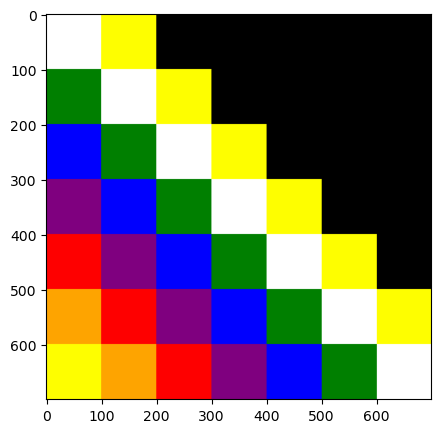

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.rcParams['figure.figsize']=[10,5]

tamanio_img=700
R = np.ones((tamanio_img, tamanio_img)) * 0
G = np.ones((tamanio_img, tamanio_img)) * 0
B = np.ones((tamanio_img, tamanio_img)) * 0

imagen=np.dstack((R,G,B))
imagen=np.array(imagen,dtype=int)

for i in range(0,700,100):
    for j in range(0, 700, 100):
        for k in range(100):
            for l in range(100):
                if(j ==i):
                    imagen[k+i,l+j] = [255, 255, 255]
                    
                elif (j+100==i): imagen[k+i,l+j] = [0,127,0]
                elif (j+200==i): imagen[k+i,l+j] = [0,0,254]
                elif (j+300==i): imagen[k+i,l+j] = [127,0,127]
                elif (j+400==i): imagen[k+i,l+j] = [254,0,0]
                elif (j+500==i): imagen[k+i,l+j] = [254,164,0]
                elif (j+600==i): imagen[k+i,l+j] = [254,254,0]
                
                elif (i+100==j): imagen[k+i,l+j] = [254,254,0]
                elif (j+200==i): imagen[k+i,l+j] = [0,0,254]
                elif (j+300==i): imagen[k+i,l+j] = [127,0,127]
                elif (j+400==i): imagen[k+i,l+j] = [254,0,0]
                elif (j+500==i): imagen[k+i,l+j] = [254,164,0]
                elif (j+600==i): imagen[k+i,l+j] = [254,254,0]


plt.figure()
plt.imshow(imagen)
plt.show()

Ejercicio 3

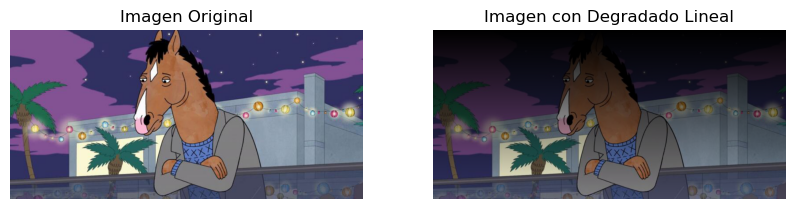

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imgExamen.jpg')  
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)  

height, width, channels = imagen.shape

mask = np.linspace(0, 1, height).reshape(height,1)
imagen_degradada = np.zeros_like(imagen, dtype=np.uint8)
for c in range(3):  
    imagen_degradada[:, :, c] = np.uint8(imagen[:, :, c] * mask)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_degradada)
plt.title("Imagen con Degradado Lineal")
plt.axis('off')

plt.show()


Ejercicio 4

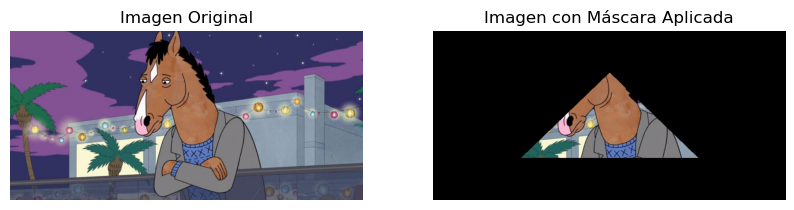

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread("imgExamen.jpg") 
altura, ancho = imagen.shape[:2]

mascara = np.zeros((altura, ancho), dtype=np.uint8)

puntos = np.array([[ancho//2, altura//26], [3*ancho//4, 3*altura//6], [ancho//4, 3*altura//6]], np.int32)

cv2.fillPoly(mascara, [puntos], 255)

resultado = cv2.bitwise_and(imagen, imagen, mask=mascara)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Máscara Aplicada")
plt.axis("off")

plt.show()


Ejercicio 5

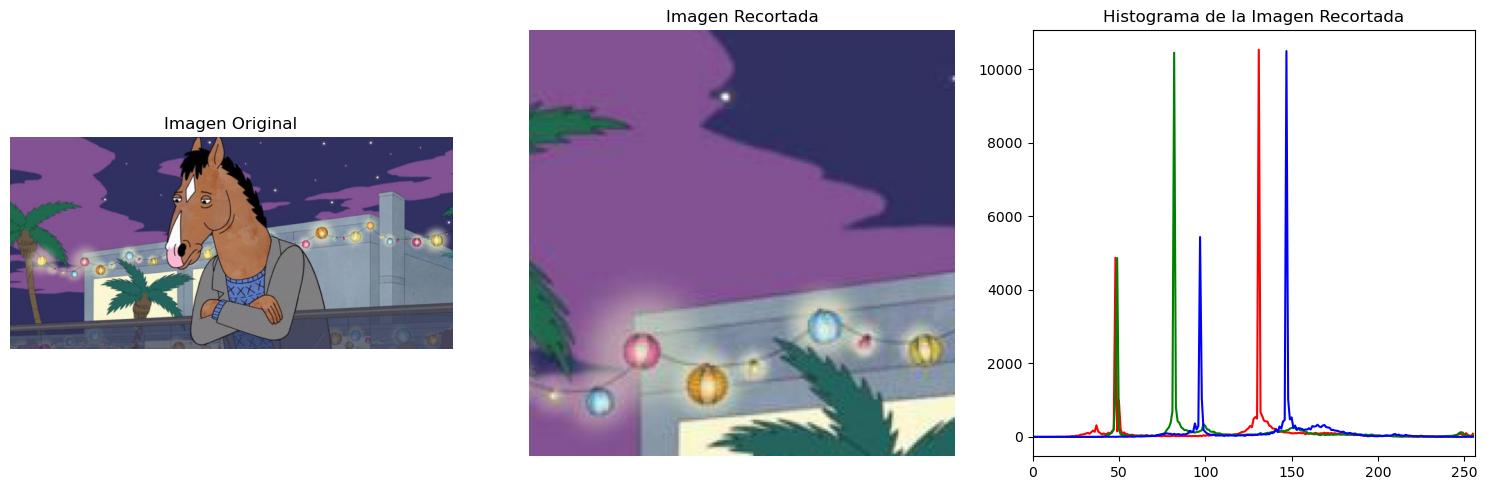

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random  

plt.rcParams['figure.figsize'] = [15, 5]

imagen = cv2.imread('imgExamen.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

alto = random.randint(0, 400)
ancho = random.randint(0, 800)
alto, ancho = min(alto, imagen_rgb.shape[0]), min(ancho, imagen_rgb.shape[1])

img_cortada = imagen_rgb[alto:ancho, alto:ancho]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(imagen_rgb)
axes[0].set_title("Imagen Original")
axes[0].axis('off')

axes[1].imshow(img_cortada)
axes[1].set_title("Imagen Recortada")
axes[1].axis('off')

color = ('r', 'g', 'b')
for canal, col in enumerate(color):
    histograma = cv2.calcHist([img_cortada], [canal], None, [256], [0, 256])
    axes[2].plot(histograma, color=col)
    axes[2].set_xlim([0, 256])
axes[2].set_title("Histograma de la Imagen Recortada")

plt.tight_layout()
plt.show()

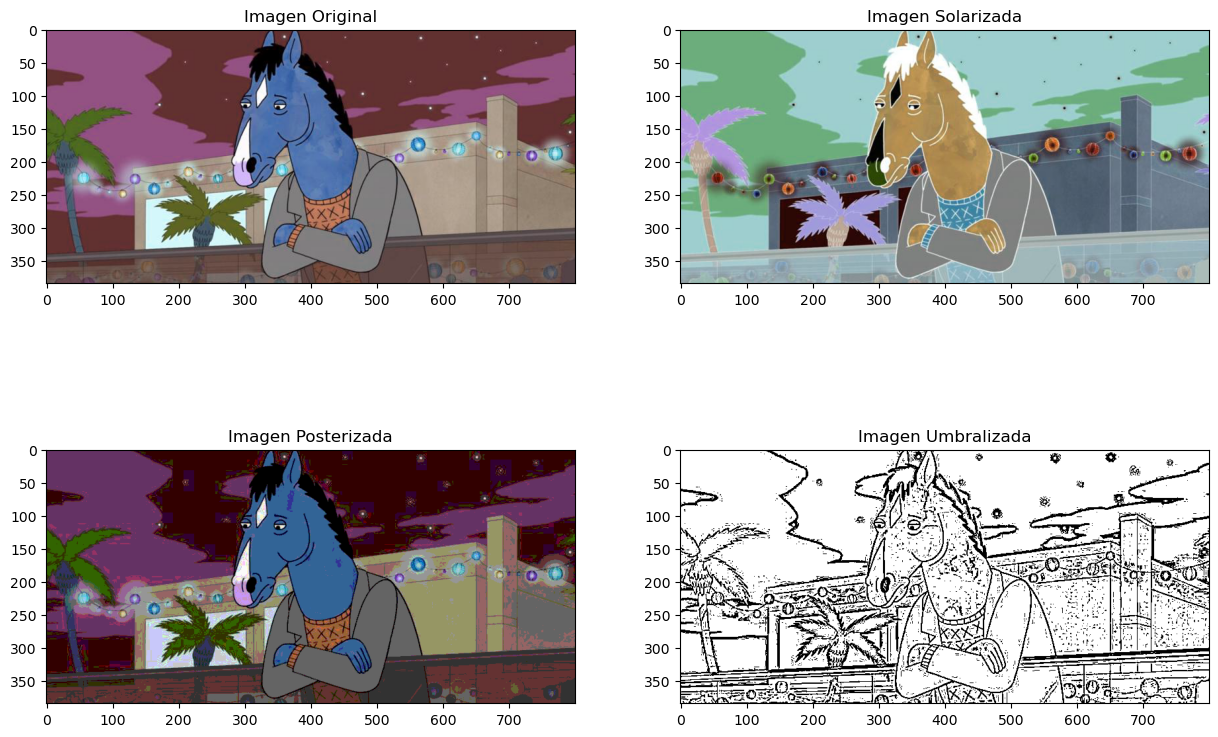

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imgExamen.jpg',cv2.COLOR_BGR2RGB)
gray = cv2.imread('imgExamen.jpg', 0)

def solarizar(imagen, umbral):
    solariImg = np.where(imagen < umbral, imagen, 255 - imagen)
    return solariImg

def posterizar(imagen, factor):
    postImg = (imagen // factor) * factor
    return postImg

img_sol = solarizar(imagen, 0)
img_pos = posterizar(imagen, 50)
umbAdap = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2.imwrite('ImgExamSol.jpeg', cv2.cvtColor(img_sol, cv2.COLOR_RGB2BGR))
cv2.imwrite('ImgExamPos.jpeg', cv2.cvtColor(img_pos, cv2.COLOR_RGB2BGR))
cv2.imwrite('ImgExamUmbral.jpeg', umbAdap)

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imagen)
plt.title('Imagen Original')

plt.subplot(222)
plt.imshow(img_sol)
plt.title('Imagen Solarizada')

plt.subplot(223)
plt.imshow(img_pos)
plt.title('Imagen Posterizada')

plt.subplot(224)
plt.imshow(umbAdap, cmap='gray')
plt.title('Imagen Umbralizada')
plt.show()

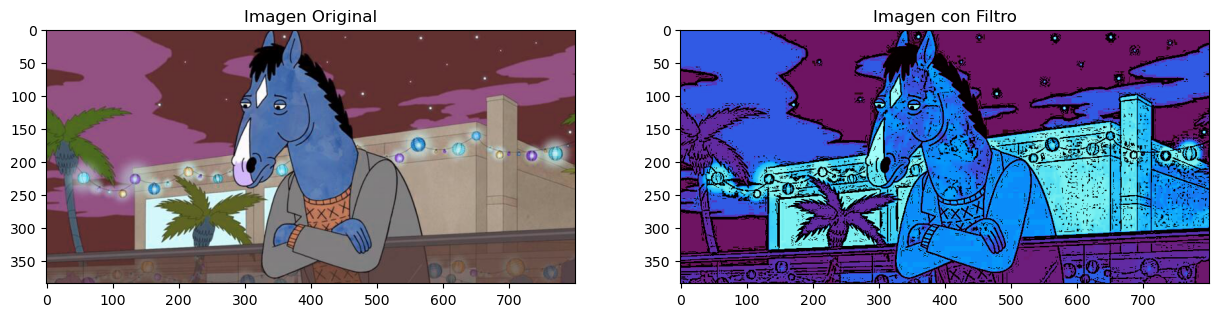

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imgExamen.jpg', cv2.COLOR_BGR2RGB)

gray = cv2.imread('imgExamen.jpg', 0)

umbAdap = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

ecualizada = cv2.equalizeHist(gray)

imagen_ycrcb = cv2.cvtColor(imagen, cv2.COLOR_BGR2YCrCb)
imagen_ycrcb[:, :, 0] = cv2.equalizeHist(imagen_ycrcb[:, :, 0])
ecuColor = cv2.cvtColor(imagen_ycrcb, cv2.COLOR_YCrCb2BGR)
ecu = cv2.cvtColor(ecuColor, cv2.COLOR_BGR2RGB)

img = cv2.bitwise_and(ecu, ecu, mask=umbAdap)

color = cv2.applyColorMap(img, cv2.COLORMAP_INFERNO)

cv2.imwrite('ImgExamFiltro.jpeg', cv2.cvtColor(color, cv2.COLOR_RGB2BGR))

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(imagen)
plt.title('Imagen Original')

plt.subplot(122)
plt.imshow(color)
plt.title('Imagen con Filtro')
plt.show()

1. Es bascicamente  un array multidimensional o matriz de pixeles
2. Es el grado de intensidad de los colores en un pixel puede ser alto o muy bajo
3. 1 es un modelo aditivo y el otro es sustractivo
